# Predicting IBM Employee Attrition: Logistic Regression vs. Random Forest

### Description
The report analyzes employee attrition using data from the "IBM.csv" dataset and builds two predictive models: Logistic Regression and Random Forest. It preprocesses the data, encodes categorical variables, and creates dummy variables. <br>
The Logistic Regression model achieves an 86.90% accuracy rate and perfect specificity, while the Random Forest model achieves an 86.39% accuracy rate and higher sensitivity. Key features influencing attrition, such as monthly income and years at the company, are identified. The report highlights potential overfitting in both models and suggests model refinement.<br>
Overall, it offers valuable insights for HR decision-making to implement retention strategies and foster a positive work environment, reducing attrition and enhancing organizational stability.<br>

###  Objectives
1.	Predictive Modeling for Attrition:<br>
● Develop and evaluate predictive models, such as Logistic Regression and Random Forest, to forecast employee attrition based on historical data.<br>
● Assess the performance of these models using accuracy, sensitivity, specificity, precision, and balanced accuracy metrics.<br>
2.	Feature Importance Analysis:<br>
● Identify key drivers of employee attrition by conducting feature importance analysis on the predictive models.<br>
● Gain insights into which variables have the most significant impact on attrition predictions and inform HR about critical factors affecting retention.<br>
3.	HR Recommendations for Retention:<br>
● Provide data-driven recommendations and actionable strategies for the Human Resources Department to reduce employee attrition.<br>
● Suggest targeted initiatives, such as improving job satisfaction, offering competitive compensation, and enhancing work-life balance to enhance employee retention.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### I. Logistic Regression Model

In [43]:
myData = pd.read_csv('IBM.csv')
myData.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


Categorical Variables:<br> 
Attrition: Employee attrition status<br> 
Department: Department of work<br> 
EducationField<br> 
MaritalStatus<br> 
<br> 
Ordinal Variables:<br> 
Education<br> 
EnvironmentSatisfaction<br> 
JobSatisfaction<br> 
WorkLifeBalance<br> 
<br> 
Numerical Variables:<br> 
Age: Age of employee<br> 
DistanceFromHome<br> 
MonthlyIncome<br> 
NumCompaniesWorked<br> 
YearsAtCompany<br> 
<br> 

In [44]:
attrition_counts = myData['Attrition'].value_counts()
attrition_counts

No     1233
Yes     237
Name: Attrition, dtype: int64

a. <br> 
From these findings, we can describe the distribution of attrition status in the dataset as follows:
The "No" class is the majority class, with 1233 occurrences, indicating that a significant portion of employees in the dataset did not experience attrition.
The "Yes" class is the minority class, with 237 occurrences, suggesting that a smaller portion of employees experienced attrition.
This information provides insights into the prevalence of attrition in the dataset, indicating that attrition is relatively less common compared to employees who did not experience attrition.<br> 

b. <br> 
Oversampling is used to address class imbalance in a dataset, where one class is significantly underrepresented. It involves artificially increasing the number of instances in the minority class by duplicating existing instances or generating synthetic data. By creating a balanced dataset, machine learning models can learn from more examples of the minority class, improving their ability to correctly classify instances from that class. This helps overcome the bias and performance issues caused by class imbalance, especially in scenarios where the minority class is important.<br>

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
myData['Attrition'] = label_encoder.fit_transform(myData['Attrition'])
myData['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [46]:
missing_values = myData.isnull().sum()
missing_values

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

Fortunately there are no missing values in this dataset. So we don't need to remove missing values. <br> 
There are several reasons why imputing values for variables with a huge percentage of missingness can be dangerous:<br> 
1. Data Distortion: Imputing missing values can change the data in a way that may not reflect its true nature, potentially distorting the patterns and relationships between variables.
2. Information Loss: Missing values often contain important information, and imputing values can result in the loss of valuable insights that could affect the analysis.
3. Increased Bias: Imputing values can introduce bias if the method used doesn't accurately capture the underlying patterns and relationships in the data.
4. Misrepresentation of Uncertainty: Imputation methods typically provide a single value for missing data, ignoring the uncertainty associated with those values, which can lead to misleading interpretations.
5. Amplification of Existing Biases: Imputing values without considering the reasons for missingness may amplify existing biases in the data and potentially reinforce unfair practices.

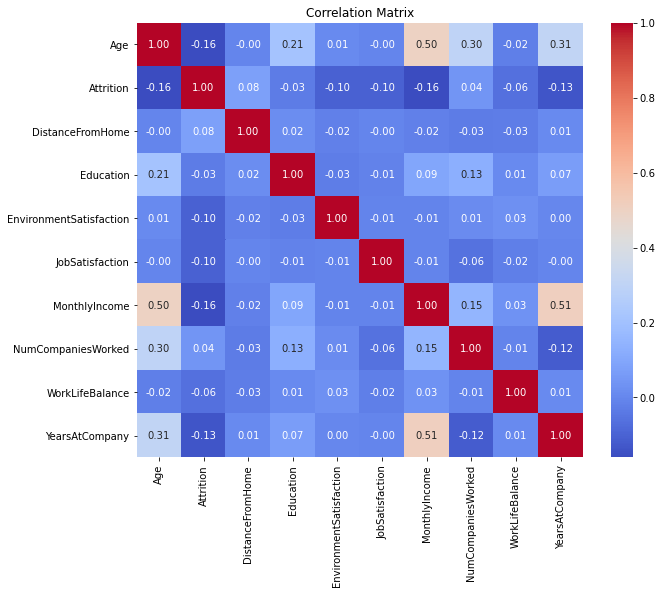

In [58]:
correlation_matrix = myData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

So first, we have to determine how high the correlations should be removed to avoid multicollinearity. For the correlation threshold, a commonly used threshold is 0.7 or 0.8. Variables with correlation coefficients above this threshold may be considered highly correlated and could be candidates for removal. I checked the table and none of the values are above 0.7, so we don't have to delete any variables.

In [48]:
myDatadu = pd.get_dummies(myData, columns=["Department", "EducationField", "MaritalStatus"], drop_first=True)
myDatadu.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,4,5993,8,1,6,0,1,1,0,0,0,0,0,1
1,49,0,8,1,3,2,5130,1,3,10,1,0,1,0,0,0,0,1,0
2,37,1,2,2,4,3,2090,6,3,0,1,0,0,0,0,1,0,0,1
3,33,0,3,4,4,3,2909,1,3,8,1,0,1,0,0,0,0,1,0
4,27,0,2,1,1,2,3468,9,3,2,1,0,0,0,1,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(myDatadu, test_size=0.4, random_state=2204)

I use my birthday as the seed value, which is April 22nd, so 2204.

In [50]:
myDatadu.groupby('Attrition').mean()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,
0,37.561233,8.915653,2.927007,2.771290,2.778589,6832.739659,2.645580,2.781022,7.369019,0.671533,0.287105,0.419303,0.100568,0.325223,0.057583,0.081103,0.477697,0.283861
1,33.607595,10.632911,2.839662,2.464135,2.468354,4787.092827,2.940928,2.658228,5.130802,0.561181,0.388186,0.375527,0.147679,0.265823,0.046414,0.135021,0.354430,0.506329


Based on the given mean values:<br> 
● MonthlyIncome: Employees with higher monthly income (mean: 6832.74) are less likely to leave compared to those with lower income (mean: 4787.09). So, higher income is likely to strongly reduce attrition.<br> 
● YearsAtCompany: Employees who have spent more years at the company (mean: 7.37) are less likely to leave compared to those with fewer years (mean: 5.13). So, longer tenure is likely to have a strong impact in reducing attrition.<br> 
● MaritalStatus_Single: Employees who are single (mean: 0.51) are more likely to leave compared to those who are not single (mean: 0.28). So, being single may have a moderate impact in increasing attrition.<br> 

In [52]:
import statsmodels.api as sm
y_train = train_set['Attrition']
X_train = train_set.drop('Attrition', axis=1)
X_train = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.406453
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                           18
Date:                Mon, 24 Jul 2023   Pseudo R-squ.:                  0.1385
Time:                        23:41:20   Log-Likelihood:                -358.49
converged:                       True   LL-Null:                       -416.13
Covariance Type:            nonrobust   LLR p-value:                 3.241e-16
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.7836      0.894      1

a. The p-values of numeric variables are higher than 0.05:<br>
Age, YearsAtCompany<br>
b. For the categorical variables, these are showing high p-values for ALL of the levels in the model:<br>
Education, WorkLifeBalance, Department (Research & Development and Sales), EducationField (Life Sciences, Marketing, Medical, Technical Degree and Other), MaritalStatus (Married)<br>

In [53]:
y2_train = train_set['Attrition']
X2_train = train_set.drop(['Attrition', 'Age', 'YearsAtCompany', 'Education', 'WorkLifeBalance',
                           'Department_Research & Development', 'Department_Sales',
                           'EducationField_Life Sciences', 'EducationField_Marketing',
                           'EducationField_Medical','EducationField_Other', 'EducationField_Technical Degree',
                           'MaritalStatus_Married', 'MaritalStatus_Single'], axis=1)

X2_train = sm.add_constant(X2_train)

logit_model2 = sm.Logit(y2_train, X2_train)
result = logit_model2.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.434104
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Jul 2023   Pseudo R-squ.:                 0.07991
Time:                        23:41:22   Log-Likelihood:                -382.88
converged:                       True   LL-Null:                       -416.13
Covariance Type:            nonrobust   LLR p-value:                 5.455e-13
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1730      0.374      0.462      0.644      -0.561   

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y = myDatadu['Attrition']
X = myDatadu.drop(['Attrition', 'Age', 'YearsAtCompany', 'Education', 'WorkLifeBalance',
                   'Department_Research & Development', 'Department_Sales',
                   'EducationField_Life Sciences', 'EducationField_Marketing',
                   'EducationField_Medical','EducationField_Other', 'EducationField_Technical Degree',
                   'MaritalStatus_Married', 'MaritalStatus_Single'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2204)

logistic_model3 = LogisticRegression()
logistic_model3.fit(X_train, y_train)

LogisticRegression()

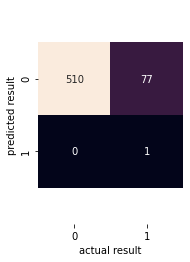

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_model3.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, square = True, fmt = 'g', annot = True, cbar = False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=.5
b-=.5
plt.ylim(a,b)
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy rate:", accuracy)

from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity rate:", sensitivity)

cm2 = confusion_matrix(y_test, y_pred)
specificity = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])
print("Specificity rate:", specificity)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Accuracy rate: 0.8690476190476191
Sensitivity rate: 0.01282051282051282
Specificity rate: 1.0
Precision: 1.0
Balanced Accuracy: 0.5064102564102564


In [19]:
y_pred_train = logistic_model3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

Accuracy on Training Set: 0.8231292517006803
Accuracy on Test Set: 0.8690476190476191


a.<br>
The purpose of comparing the accuracy values on the training set and the test set is to evaluate how well the model generalizes to unseen data. It helps us assess whether the model is overfitting or underfitting. <br>
b.<br>
In this case, the comparison of the accuracy values suggests that the model performs reasonably well on both the training set and the test set. The fact that the accuracy on the test set is close to the accuracy on the training set suggests that the model is generalizing well to unseen data. It indicates that the model is not suffering from significant overfitting, where it performs well on the training set but poorly on new data. 

In [20]:
X_test.describe()

,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked
count,588.000000,588.000000,588.000000,588.000000,588.000000
mean,9.600340,2.814626,2.727891,6442.176871,2.591837
std,8.521851,1.092638,1.098600,4633.334968,2.415890
min,1.000000,1.000000,1.000000,1052.000000,0.000000
25%,2.000000,2.000000,2.000000,2934.250000,1.000000
50%,7.000000,3.000000,3.000000,4835.500000,2.000000
75%,15.250000,4.000000,4.000000,8130.500000,4.000000
max,29.000000,4.000000,4.000000,19973.000000,9.000000


In [21]:
employee_data = pd.DataFrame([{'DistanceFromHome': 10, 'EnvironmentSatisfaction': 4, 'JobSatisfaction': 3, 'MonthlyIncome': 5500, 'NumCompaniesWorked': 3
}])
employee_prediction = logistic_model3.predict(employee_data)

print("Employee Attrition Prediction:", employee_prediction)

Employee Attrition Prediction: [0]


In [22]:
logistic_model3.predict_proba(employee_data)

array([[0.87716049, 0.12283951]])

a.<br>
Here I create a worker and throw his data into the logistic regression model. In the end, the employee was predicted by the model not to leave, I think it was because his salary reached 5500 and his satisfaction was very high.<br>
b.<br>
For this employee, it shows that he has a probability of 87.7% that he will not resign. This is a very strong number, so HR does not need to talk to him.<br>

It is important to use values within the range of the dataset used to build the logistic regression model because the model's predictions are based on the patterns observed in the training data. Extrapolating beyond the observed range can lead to unreliable and inaccurate predictions as the model's assumptions and relationships may not hold true. By limiting predictions to the range of the training data, we ensure more accurate and meaningful results.

In [23]:
employee_data2 = pd.DataFrame([{'DistanceFromHome': 300, 'EnvironmentSatisfaction': 1, 'JobSatisfaction': 1, 'MonthlyIncome': 100, 'NumCompaniesWorked': 20
}])

employee_prediction2 = logistic_model3.predict(employee_data2)

print("Employee Attrition Prediction:", employee_prediction2)
logistic_model3.predict_proba(employee_data2)

Employee Attrition Prediction: [1]


array([[5.91405465e-06, 9.99994086e-01]])

It can be seen from the above probabilities and results that if my distance is set at 300 kilometers and the salary is only 100$, then his probability of leaving will become very extreme. Some wildly out-of-range input values could have caused the model to deliver a predicted y-value that is orders of magnitude bigger than any true outcome for that variable.

### II. Random Forest Model

In [24]:
myData2 = pd.read_csv('IBM.csv')
myData2.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [25]:
categorical_vars = ['Department', 'EducationField', 'MaritalStatus']
data_encoded = pd.get_dummies(myData2, columns=categorical_vars, drop_first=False)

label_encoder = LabelEncoder()
data_encoded['Attrition'] = label_encoder.fit_transform(myData2['Attrition'])

data_encoded.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,4,5993,8,1,6,...,1,0,1,0,0,0,0,0,0,1
1,49,0,8,1,3,2,5130,1,3,10,...,0,0,1,0,0,0,0,0,1,0
2,37,1,2,2,4,3,2090,6,3,0,...,0,0,0,0,0,1,0,0,0,1
3,33,0,3,4,4,3,2909,1,3,8,...,0,0,1,0,0,0,0,0,1,0
4,27,0,2,1,1,2,3468,9,3,2,...,0,0,0,0,1,0,0,0,1,0


In [26]:
y = data_encoded['Attrition']
X = data_encoded.drop('Attrition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2204)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=2204)

grid_search = GridSearchCV(rf_model, param_grid, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8423985618900873


In [28]:
best_rf_model = RandomForestClassifier(random_state=2204, **grid_search.best_params_)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=2204)

In [29]:
feature_importance = best_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

                              Feature  Importance
5                       MonthlyIncome    0.171489
0                                 Age    0.136894
8                      YearsAtCompany    0.124561
1                    DistanceFromHome    0.109501
3             EnvironmentSatisfaction    0.067764
6                  NumCompaniesWorked    0.067733
7                     WorkLifeBalance    0.048508
4                     JobSatisfaction    0.047527
2                           Education    0.044938
20               MaritalStatus_Single    0.033000
11                   Department_Sales    0.018700
15             EducationField_Medical    0.018428
13       EducationField_Life Sciences    0.016325
17    EducationField_Technical Degree    0.016085
19              MaritalStatus_Married    0.015637
10  Department_Research & Development    0.015584
18             MaritalStatus_Divorced    0.014225
14           EducationField_Marketing    0.010992
9          Department_Human Resources    0.008558


Interpreting feature importance in a Random Forest model:<br>
● The feature importance score represents the relative contribution of each variable in the model's decision-making process.<br>
● Higher feature importance values indicate that the variable has a stronger impact on the model's predictions.<br>
● Feature importance can be interpreted as the reduction in the model's impurity (e.g., Gini impurity or entropy) achieved by splitting on that feature across all trees in the Random Forest.<br>
● It provides insight into which variables are most influential in the model's performance and can help identify key factors driving predictions.<br>
By analyzing the variable importance ranking, you can identify the most influential features in your Random Forest model and gain insights into which variables are most relevant for predicting the target variable.<br>

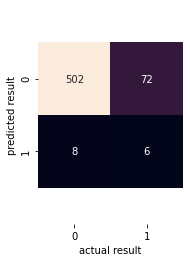

In [38]:
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, square = True, fmt = 'g', annot = True, cbar = False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=.5
b-=.5
plt.ylim(a,b)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy rate:", accuracy)

from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity rate:", sensitivity)

cm2 = confusion_matrix(y_test, y_pred)
specificity = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])
print("Specificity rate:", specificity)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Accuracy rate: 0.8639455782312925
Sensitivity rate: 0.07692307692307693
Specificity rate: 0.984313725490196
Precision: 0.42857142857142855
Balanced Accuracy: 0.5306184012066365


In [40]:
y_train_pred = best_rf_model.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)

Training Accuracy: 0.9591836734693877
Test Accuracy: 0.8639455782312925


The difference between the training accuracy and the test accuracy is approximately 9.53 percentage points. It indicates that the model is performing significantly better on the training set compared to the test set. Such a difference suggests that the model may be overfitting the training data, meaning it has learned the patterns in the training set too well and is not generalizing effectively to new, unseen data.

In [41]:
new_data = {'Age':20, 'DistanceFromHome':10, 'Education':2,
'EnvironmentSatisfaction':4, 'JobSatisfaction':3, 'MonthlyIncome':5500,
'Department_Research & Development':1, 'Department_Human Resources':0,
'NumCompaniesWorked':3, 'WorkLifeBalance':2, 'YearsAtCompany':2,
'Department_Sales':0, 'EducationField_Human Resources':0,
'EducationField_Life Sciences':0, 'EducationField_Marketing':0,
'EducationField_Medical':1, 'EducationField_Other':0,
'EducationField_Technical Degree':0, 'MaritalStatus_Divorced':0,
'MaritalStatus_Married':0, 'MaritalStatus_Single':1 }

new_data_df = pd.DataFrame([new_data])

# Predict the outcome using the trained Random Forest model
prediction = best_rf_model.predict(new_data_df)
prediction

array([0])

Since the last employee did not have complete information, I created a new employee, but it should be noted that his {'DistanceFromHome': 10, 'EnvironmentSatisfaction': 4, 'JobSatisfaction': 3, 'MonthlyIncome': 5500, 'NumCompaniesWorked': 3} is same as the above data. After creating all data of this employee, I input it for random forest prediction. As you can see here, my model predicts that this person will not leave. And the Logis regression above also predicts that this person will not resign. So the predictions are the same.

### Conclusion
The models we built in this assignment can be very useful for a company's HR department. They can predict if an employee is likely to leave and assess how likely it is (they even have the probability). This information can help HR be proactive in addressing retention issues, providing personalized support, and making decisions to reduce attrition. By analyzing factors like job satisfaction and income, HR can understand what drives employees to leave and take steps to improve satisfaction and retention. Overall, these models enable HR to make data-driven decisions and implement effective strategies for retaining employees and improving organizational stability.